<h2> Breast Cancer Data Science Project

<h3> The Dataset</h3>

This project uses data collected from the UCI Machine Leaning Database. The data itself is breast cancer data collected in Wisconsin; the features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


Attribute Information:

1) ID number                                                       
2) Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)                                                         
b) texture (standard deviation of gray-scale values)               
c) perimeter                                                       
d) area                                                             
e) smoothness (local variation in radius lengths)                   
f) compactness (perimeter^2 / area - 1.0)                           
g) concavity (severity of concave portions of the contour)         
h) concave points (number of concave portions of the contour)       
i) symmetry                                                         
j) fractal dimension ("coastline approximation" - 1)               


The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


All feature values are recoded with four significant digits.

Missing attribute values: None

Class distribution: 357 benign, 212 malignant

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import *

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### EDA

In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#replace all malignant diagnoses with 1 and benign diagnoses with 0
data['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#function to draw table of missing values
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(data)

,Total,Percent
Unnamed: 32,569,1.0
area_se,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0


### Class Imbalance

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212
% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


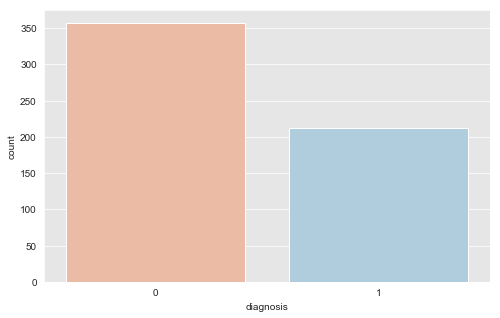

In [48]:
#displaying the balance of class data
plt.figure(figsize=(8, 5))
sns.countplot(data['diagnosis'], palette='RdBu')

benign, malignant = data['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)

print('% of cells labeled Benign', round(benign / len(data) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(data) * 100, 2), '%')

This dataset has a good split between classes, this bodes well for running the model as there isn't an imbalance which could cause misclassification errors.

In [9]:
#drop ID and Unnamed columns as these hold arbitrary and null values respectively therefore are unnecessary for models
columns = ['id', 'Unnamed: 32']
data.drop(columns, axis = 1, inplace=True)

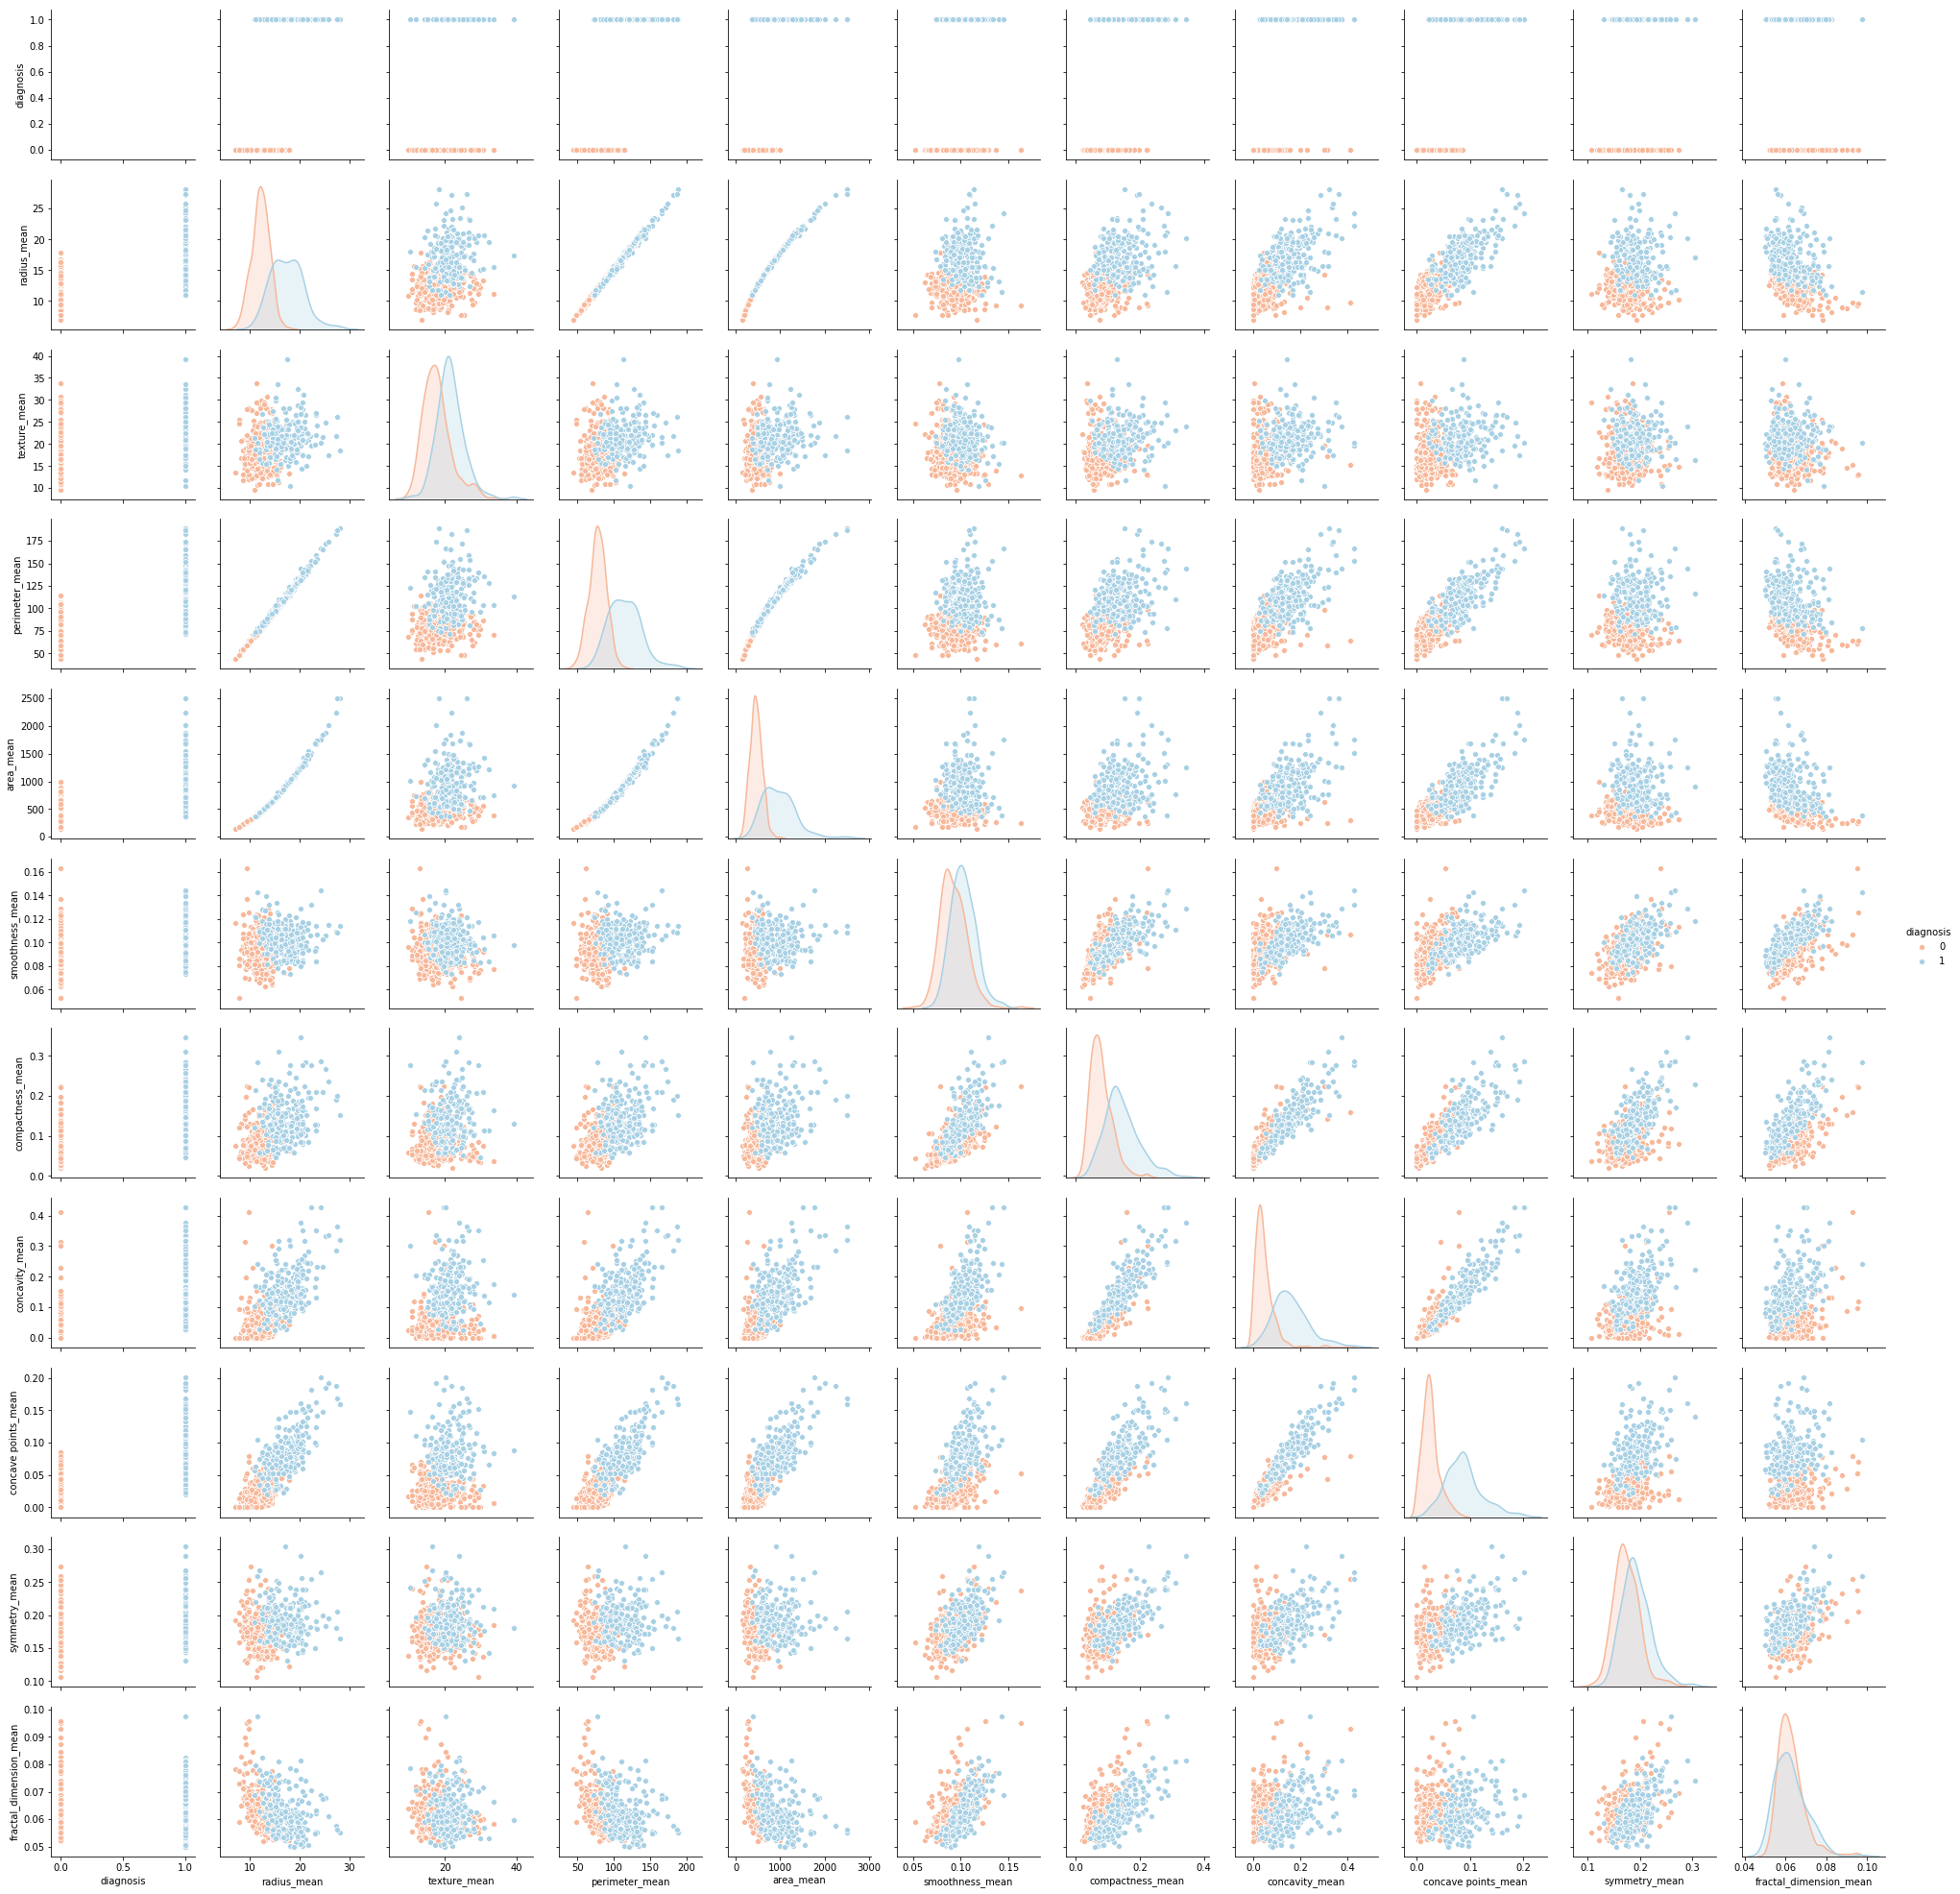

In [10]:
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']
sns.pairplot(data=data[cols], hue='diagnosis', palette='RdBu')

### Running a Logistic Regression with Lasso before removing features

In [15]:
cols = data.columns.drop('diagnosis')
X = data[cols]
Y = data.diagnosis

scaler = StandardScaler()
X_rescaled1 = scaler.fit_transform(X)
X_rescaled1 = pd.DataFrame(X_rescaled1, columns= cols)
X_rescaled1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [17]:
logreg_no = LogisticRegression(fit_intercept=False,solver = 'liblinear', C = 100, penalty= 'l1')
model_noreg = logreg_no.fit(X_rescaled1, Y)
model_noreg

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_hat = logreg_no.predict(X_rescaled1)
residuals = np.abs(Y - y_hat)
print(pd.Series(residuals).value_counts(normalize=True))

cvs = cross_val_score(logreg_no, X_rescaled1, Y, cv = 5)
cvs

0    0.99297
1    0.00703
Name: diagnosis, dtype: float64


array([0.95652174, 0.93043478, 0.95575221, 0.96460177, 0.99115044])

In [21]:
cm = confusion_matrix(Y,y_hat)
cm

array([[356,   1],
       [  3, 209]])

In [22]:
print(classification_report(Y,y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       357
           1       1.00      0.99      0.99       212

   micro avg       0.99      0.99      0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



AUC: 0.9915239680777972


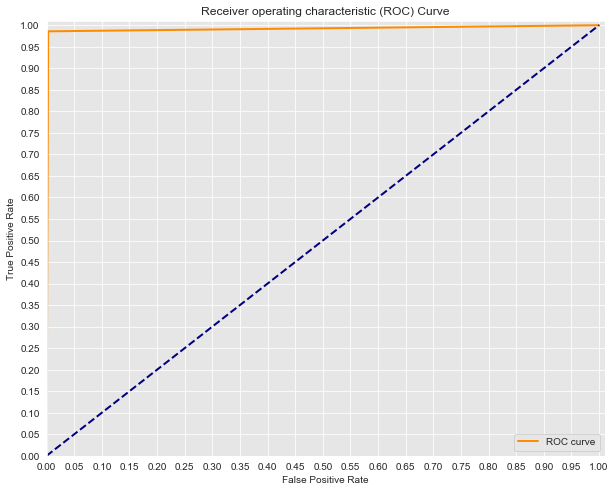

In [25]:
#create ROC plot and compute the AUC value

fpr,tpr,thresholds = roc_curve(Y,y_hat)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Looking for Multicollinearity

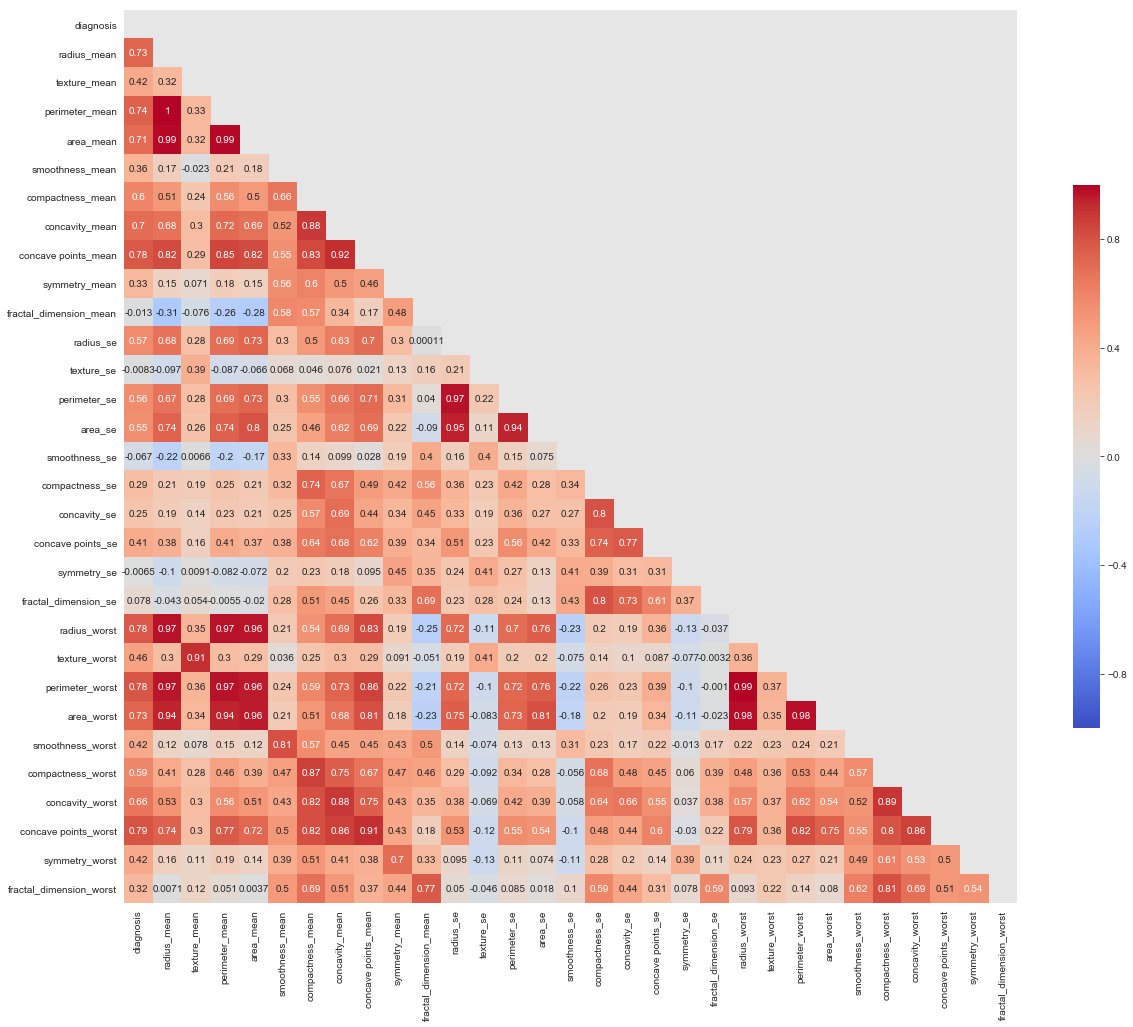

In [26]:
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, mask=mask, 
            cmap = 'coolwarm', annot = True, 
            cbar_kws={"shrink": .5}, square=True)


### The Data

It seems that this data contains a lot of multicollinear information, such as radius, perimeter and area which all display similar physical information about the size of cancer cells. One metric for size must be selected for the purposes of modeling; radius will be chosen as it is the most fundamental measurement from which perimeter and area are calculated.

This is also the case for the relationship between mean and worst, which shows a high correlation. This is because  "worst" or largest (mean of the three largest values) is related to mean through calculation. Therefore, for the purposes of this analysis, the "worst" values will be dropped.

Another island of multicollinearity can be seen in the concavity, compactness and concave points features.

Compactness - (perimeter^2 / area - 1.0)                                                                             
Concavity - (severity of concave portions of the contour)                                                             
Concave points - (number of concave portions of the contour)                                                         

Due to the similarity of compactness to other measures of size and the relative correlations therein, I will remove this feature. Additionally, concavity and concave points are both highly correlated, almost certainly due to the similarity of the physical attribute they measure. Therefore, I will select concavity as the metric in the model.

In [12]:
#Drop all "worst" columns
cols = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
        'smoothness_worst', 'compactness_worst', 'concavity_worst', 
        'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data = data.drop(cols, axis= 1)

#Drop all size columns related to the "perimeter" and "area" 
cols = ['perimeter_mean','perimeter_se', 'area_mean', 'area_se']
data = data.drop(cols, axis=1)

# #Drop all columns for "concavity" and "concave points"
cols = ['compactness_mean','compactness_se', 'concave points_mean', 'concave points_se']
data = data.drop(cols, axis=1)

This dataset contains a good split between those diagnosed and those undiagnosed. 

In [13]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

<h3> Define X and Y

In [14]:
x_feats = ['radius_mean', 'texture_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se']
X = data[x_feats]
Y = data['diagnosis']

<h3> Scaling Data

In [15]:
scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_rescaled, columns = ['radius_mean', 'texture_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se'])

In [16]:
X_rescaled.head()

,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se
0,0.521037,0.022658,0.593753,0.703140,0.686364,0.605518,0.356147,0.120469,0.159296,0.135682,0.311645,0.183042
1,0.643144,0.272574,0.289880,0.203608,0.379798,0.141323,0.156437,0.082589,0.119387,0.046970,0.084539,0.091110
2,0.601496,0.390260,0.514309,0.462512,0.509596,0.211247,0.229622,0.094303,0.150831,0.096768,0.205690,0.127006
3,0.210090,0.360839,0.811321,0.565604,0.776263,1.000000,0.139091,0.175875,0.251453,0.142955,0.728148,0.287205
4,0.629893,0.156578,0.430351,0.463918,0.378283,0.186816,0.233822,0.093065,0.332359,0.143636,0.136179,0.145800


### Train-Test Split 

In [17]:
#define train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled,Y, test_size = 0.3, random_state=0)

### Logistic Regression in Scikit-Learn

In this specific case of breast cancer prediction, it must be noted that we must preferentially choose to reduce the instances of false negatives. Due to the nature of medical diagnoses, a false positive is preferred as this can be later ruled out as a false positive. However, in the instance of a false negative, the patient may continue to live undiagnosed but with malignant cancer, this is very dangerous as early treatment is essential to reduce mortality and chance of metastasis. 

In [18]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear', penalty='l2')
model_log = logreg.fit(X_train, Y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [19]:
cvs = cross_val_score(logreg, X_rescaled, Y, cv = 5)
cvs

array([0.93043478, 0.92173913, 0.95575221, 0.92920354, 0.94690265])

In [20]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [27]:
residuals = np.abs(Y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    381
1     17
Name: diagnosis, dtype: int64
0    0.957286
1    0.042714
Name: diagnosis, dtype: float64


In [30]:
residuals = np.abs(Y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    162
1      9
Name: diagnosis, dtype: int64
0    0.947368
1    0.052632
Name: diagnosis, dtype: float64


In [100]:
cnf_matrix = confusion_matrix(Y_test, y_hat_test)
print('Confusion Matrix for Test Data:\n',cnf_matrix)

Confusion Matrix for Test Data:
 [[105   3]
 [  6  57]]


In [101]:
cnf_matrix = confusion_matrix(Y_train, y_hat_train)
print('Confusion Matrix for Training Data:\n',cnf_matrix)

Confusion Matrix for Training Data:
 [[241   8]
 [  9 140]]


The confusion matrix shows the number of true and false, positives and negatives. In this case we had 105 true negatives, and 57 true positives. Whereas we had 6 false negatives and 3 false positives. In the case of this dataset we must consider the effect of false positives and false negatives on the outcome of treatment.

In [33]:
print(classification_report(Y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
def accuracy(tp, tn, tot):
    accuracy = (tp + tn)/tot
    print('Accuracy :',accuracy)

In [99]:
accuracy(105,57,171)#accuracy of test data
accuracy(241,140,398)#accuracy of training data

Accuracy : 0.9473684210526315
Accuracy : 0.957286432160804


Here we can see the classification report for the model. The precision of the model indicates that 95% of the selected items are relevant for both classifications. The recall of the model indicates that 97% and 90% of the relevant items were selected in benign and malignant classes respectively. F1 score is the harmonic average of precision and recall and penalizes the model if it is skewed in either direction. The F1 score is quite high considering a perfect predictor F1 score of 1; we achieved a score of 96% and 93% for benign and malignant respectively indicating good prediction. It must also be noted that in this case a good metric for the level of true and false negatives is specificity which for this model comes to:

Test Set: 97%
Training Set: 97%

This means that 97% of the negative cases were True Negative, on the other hand, the instance of false negatives is only ~3% which is a good score, however is still high for medical purposes where a higher score may be necessary.

In [36]:
#calculate fpr and tpr for the ROC curve
y_score = logreg.fit(X_train, Y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_score)

AUC: 0.9631099353321575


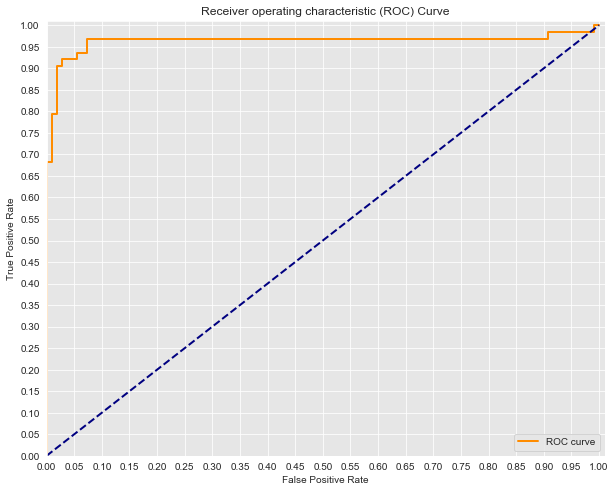

In [102]:
#create ROC plot and compute the AUC value

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

From the information above, we can see that the Reciever Operating Characteristic (ROC) curve indicates an excellent model. The ROC curve displays the true positive rate vs the false positive rate. The information for AUC shows that we have 96% precision in our classifier, which is very high and nearly a perfect classifier.

### Logistic Regression with L1 'Lasso Regularisation'

In [92]:
#fit model for Lasso regularisation
logreg1 = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear', penalty='l1')
model_log = logreg1.fit(X_train, Y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [93]:
cvs = cross_val_score(logreg1, X_rescaled, Y, cv = 5)
cvs

array([0.93043478, 0.92173913, 0.95575221, 0.92920354, 0.94690265])

In [94]:
y_hat_test = logreg1.predict(X_test)
y_hat_train = logreg1.predict(X_train)

In [95]:
residuals = np.abs(Y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    381
1     17
Name: diagnosis, dtype: int64
0    0.957286
1    0.042714
Name: diagnosis, dtype: float64


In [96]:
logreg.coef_

array([[-12.50748779,   7.7431773 ,  -7.6303154 ,  61.26261254,
          2.66653803,  -8.78897429,  38.63608512,  -6.07003242,
         -8.69943144, -68.54585846,  -5.94936406, -15.09463454]])

From the information above, it can be seen that implementing a Lasso regularization has no effect on the outcome of the model. Additionally, other values of C were tried but reducing the value of C below 100 had a negative effect on model outcome when considering the cross validation scores. Lasso most likely had such a small effect due to the prior removal of multicollinear features, therefore only changing coefficients negligibly. 

### Logistic Regression in StatsModels

In [22]:
cols = data.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula)

diagnosis ~ radius_mean + texture_mean + smoothness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + concavity_se + symmetry_se + fractal_dimension_se


In [23]:
model = smf.glm(formula=formula, data=data, family=sm.families.Binomial())
logistic_fit = model.fit()

logistic_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      556
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 19 Aug 2019   Deviance:                          nan
Time:                        14:00:21   Pearson chi2:                     312.
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -33.2062      8.726     -3.806      0.000     -50.308     -16.105
radius_mean                0.8174      0.247      3.304      0.001       0.333       1.302
texture_mean               0.5034      0.093      5.411      0.000       0.321       0.686
smoothness_mean           55.9938     39.806      1.407      0.160     -22.024     134.012
concavity_mean            68.7593     14.606      4.708      0.000      40.132      97.386
symmetry_mean             25.1353     16.193      1.552      0.121      -6.602      56.873
fractal_dimension_mean   -15.4070     94.840     -0.162      0.871    -201.289     170.475
radius_se                  8.0755      2.902      2.783      0.005       2.388      13.763
texture_se                -1.6454      0.766     -2.148      0.032      -3.147      -0.144
smoothness_se             41.0608    124.683      0.329      0.742    -203.313     285.434
concavity_se             -51.0249     34.072     -1.498      0.134    -117.806      15.756
symmetry_se              -50.9823     50.867     -1.002      0.316    -150.679      48.714
fractal_dimension_se    -620.0553    328.490     -1.888      0.059   -1263.884      23.773
==========================================================================================
"""

Judging by the metrics above, certain features stand out with a particularly high p-value, for the purposes of improving the model fractal_dimension_mean, smoothness_se and symmetry_se will be removed and the model tested again.

In [24]:
formula = 'diagnosis ~ radius_mean + texture_mean + smoothness_mean + concavity_mean + symmetry_mean + radius_se + texture_se + concavity_se + fractal_dimension_se'

model = smf.glm(formula=formula, data=data, family=sm.families.Binomial())
logistic_fit = model.fit()

logistic_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      559
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 19 Aug 2019   Deviance:                          nan
Time:                        14:00:21   Pearson chi2:                     316.
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -34.2272      6.426     -5.326      0.000     -46.822     -21.632
radius_mean              0.8558      0.214      4.004      0.000       0.437       1.275
texture_mean             0.5113      0.093      5.527      0.000       0.330       0.693
smoothness_mean         66.6498     29.976      2.223      0.026       7.898     125.402
concavity_mean          66.3617     11.823      5.613      0.000      43.189      89.535
symmetry_mean           13.9163     11.861      1.173      0.241      -9.332      37.164
radius_se                8.1328      2.776      2.930      0.003       2.692      13.574
texture_se              -1.7536      0.752     -2.331      0.020      -3.228      -0.279
concavity_se           -44.6386     26.772     -1.667      0.095     -97.111       7.834
fractal_dimension_se  -690.5150    260.242     -2.653      0.008   -1200.579    -180.451
========================================================================================
"""

### Linear Regression 

In [32]:
formula = 'concavity_mean ~ compactness_mean'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         concavity_mean   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2009.
Date:                Tue, 20 Aug 2019   Prob (F-statistic):          1.62e-188
Time:                        13:12:50   Log-Likelihood:                 1062.9
No. Observations:                 569   AIC:                            -2122.
Df Residuals:                     567   BIC:                            -2113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0503      0.003    -14.463      0.000      -0.057      -0.043
compactness_mean     1.3331      0.030     44.823      0.000       1.275       1.391
==============================================================================
Omnibus:                      143.184   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.546
Skew:                           0.941   Prob(JB):                    2.56e-199
Kurtosis:                       8.919   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

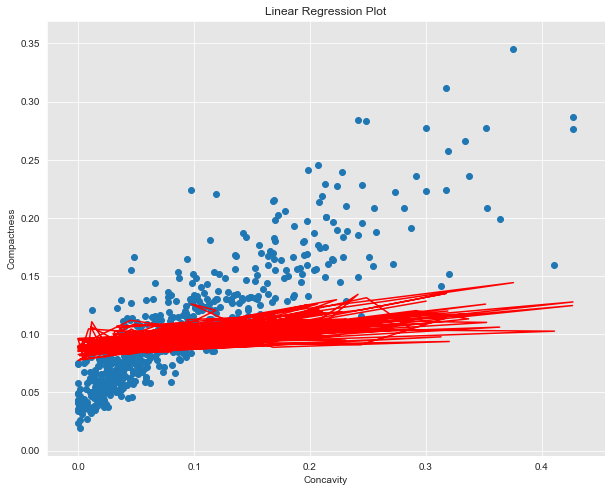

In [70]:
plt.figure(figsize=(10,8))
X=data.concavity_mean
Y=data.compactness_mean
Y_pred = model.predict()
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.title('Linear Regression Plot')
plt.xlabel('Concavity')
plt.ylabel('Compactness')
plt.show()

In [38]:
#test to determine homoscedasticity
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
print(name, test)

['F statistic', 'p-value'] (0.7967717287447407, 0.9716305796632697, 'increasing')


In [47]:
formula = 'smoothness_mean ~ compactness_mean + concavity_mean + symmetry_mean'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        smoothness_mean   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     179.1
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           1.39e-81
Time:                        14:42:20   Log-Likelihood:                 1809.5
No. Observations:                 569   AIC:                            -3611.
Df Residuals:                     565   BIC:                            -3594.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0576      0.003     18.935      0.000       0.052       0.064
compactness_mean     0.1931      0.019     10.373      0.000       0.157       0.230
concavity_mean      -0.0421      0.011     -3.704      0.000      -0.064      -0.020
symmetry_mean        0.1233      0.019      6.344      0.000       0.085       0.161
==============================================================================
Omnibus:                        7.847   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               10.420
Skew:                           0.124   Prob(JB):                      0.00546
Kurtosis:                       3.615   Cond. No.                         57.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""